## First, evaluate efficacy of logistic regression on new data

ONE MODEL EXAMPLE:


  0%|          | 0/100 [00:00<?, ?it/s]



logistic regression classifier
-------------
accuracy: 92.0 %
baseline: 52.0 %

f1:         0.9231
precision:  0.9231
recall:     0.9231


size of vocab: 16038

   top "real" words top "fake" words
0            reddit          submiss
1             chanc             herp
2           sponsor            camel
3           weather        copyright
4             cooki          revcont
5          nigerian          miracul
6             trend            saudi
7               tue           vaccin
8            cloudi         sarasota
9              gist        uncategor
10           hearst               ar
11          nigeria             agre
12            sport              org
13       bangladesh            eugen
14             kent           infect
15               bd       bilderberg
16          newspap           archiv
17              app             hodg
18            salli          prepper
19             anew       coronaviru


100%|██████████| 100/100 [23:36<00:00, 14.16s/it]

      metric  lower_bound      mean  upper_bound
0   accuracy     0.884374  0.922600     0.960826
1         f1     0.884320  0.922864     0.961409
2  precision     0.860151  0.918011     0.975870
3     recall     0.880372  0.931333     0.982294


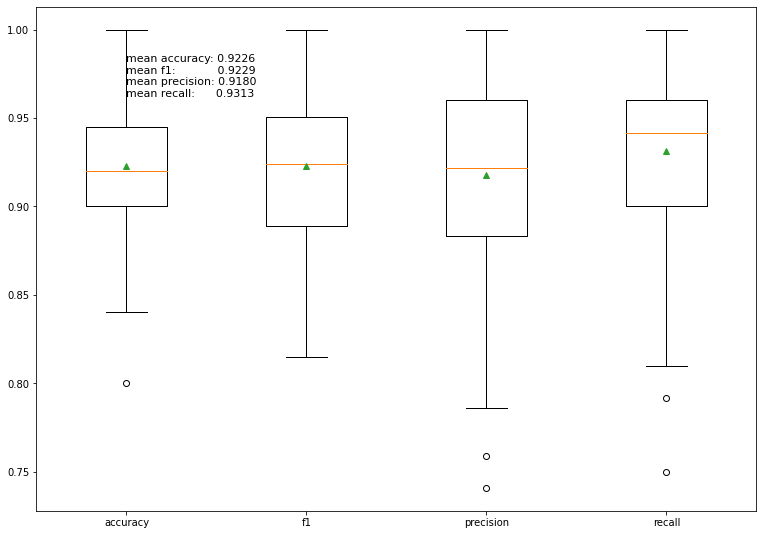

In [1]:
from analysis_functions import *
import pickle

with open('html_df_tokenized.pkl', 'rb') as f:
    df = pickle.load(f)
f.close()

print('ONE MODEL EXAMPLE:')
model, _, X_test, _, y_test, _, vocab = train_logistic_regression(df, 'tokenized', meta_name=False)
accuracy, f1, precision, recall = evaluate_logistic_regression(model, X_test, y_test, vocab, PRINT=True)

_ = confidence_interval_logistic_regression(100, df)

ONE MODEL EXAMPLE:


  0%|          | 0/100 [00:00<?, ?it/s]



logistic regression classifier
-------------
accuracy: 91.6 %
baseline: 50.4 %

f1:         0.9202
precision:  0.8832
recall:     0.9603


size of vocab: 30195

   top "real" words top "fake" words
0             paper        wordpress
1             print              web
2            counti          privaci
3            inclin           kamala
4          greenvil        uncategor
5               cme       brainberri
6        pittsburgh            trump
7           magazin            biden
8               sep            click
9            editor             mask
10          weather          freedom
11             nejm            prank
12       commentari             anya
13              art        menstrual
14          vermont              jab
15         newslett         missouri
16         subscrib            harri
17           yakima        copyright
18         obituari          browser
19           republ              ron


100%|██████████| 100/100 [1:23:37<00:00, 50.18s/it]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.920261  0.933600     0.946939
1         f1     0.920244  0.934448     0.948651
2  precision     0.893110  0.916066     0.939021
3     recall     0.935788  0.954109     0.972430


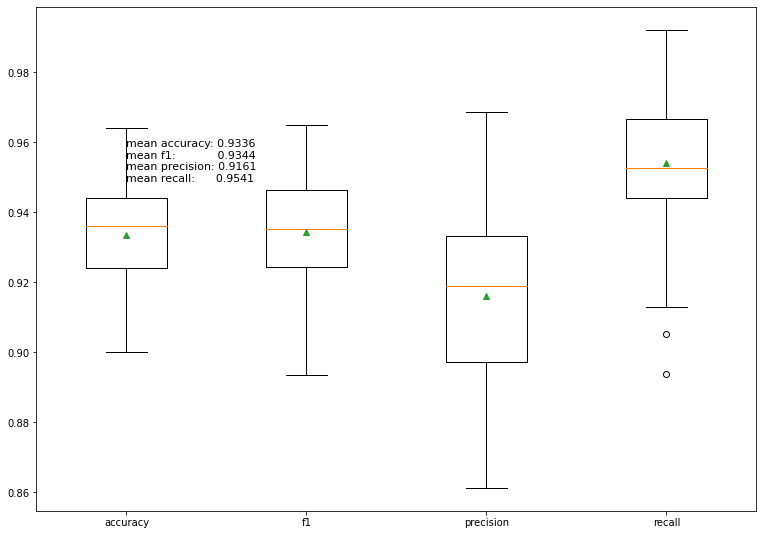

In [1]:
from analysis_functions import *
import pickle

with open('html_df_tokenized.pkl', 'rb') as f:
    df = pickle.load(f)
f.close()

print('ONE MODEL EXAMPLE:')
model, _, X_test, _, y_test, _, vocab = train_logistic_regression(df, 'tokenized', meta_name=False)
accuracy, f1, precision, recall = evaluate_logistic_regression(model, X_test, y_test, vocab, PRINT=True)

_ = confidence_interval_logistic_regression(100, df)

## Investigate top logits

In [2]:
from analysis_functions import *
import pickle

with open('html_df_tokenized.pkl', 'rb') as f:
    df = pickle.load(f)
f.close()

logit_weights, logit_signs, logit_tokens = logit_explained_variance(df, 'tokenized', num_iterations=100)

with open('logit_weights.pkl', 'wb') as f:
    pickle.dump(logit_weights,f)
f.close()

with open('logit_signs.pkl', 'wb') as f:
    pickle.dump(logit_signs, f)
f.close()

with open('logit_tokens.pkl', 'wb') as f:
    pickle.dump(logit_tokens, f)
f.close()

100%|██████████| 100/100 [1:14:36<00:00, 44.76s/it]


In [4]:
for i in range(1,100):
    print('{} : {}'.format(logit_tokens[i], logit_weights[i]))

wordpress : 0.013258997724830078
obituari : -0.011500294056761616
uncategor : 0.008705618443888447
web : 0.008542611113792219
privaci : 0.008522098901952603
trump : 0.008133567386967104
republ : -0.008031338489367504
di : 0.007907385486971834
kamala : 0.007265969430718785
prank : 0.006844815288077756
vermont : -0.006750344520496553
yakima : -0.006539790678090215
brainberri : 0.006523347896598912
liberti : 0.006109370407752982
dr : 0.005877478800340013
mask : 0.005713998287077787
biden : 0.005692654144264211
funer : -0.005677532836411172
click : 0.005620893569192142
net : 0.00554878511679405
menu : 0.005438308799422793
freedom : 0.0052666400675123425
newslett : -0.005254540119057187
subscrib : -0.004746928935350506
browser : 0.004717544833650749
jab : 0.0044943110002666105
menstrual : 0.004394794577276517
plandem : 0.004385810205984928
der : 0.0043828275721310515
il : 0.0043476742891312755
ddo : 0.004239332950004576
blog : 0.004194647692672496
art : -0.004144419226122618
werner : -0.004